In [608]:
import pandas as pd
import numpy as np

データの読み込み

In [609]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [610]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


学習データを特徴量と目的変数に分ける

In [611]:
train_x = train.drop(['Survived'],axis=1)
train_y = train['Survived']

#テストデータは特徴量のみなのでそのまま
test_x = test.copy()

データの揺れ(型)を確認する

In [612]:
train_x.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

データの欠損値の確認をする

In [613]:
train_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [614]:
test_x.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

####  変数の削除をする

In [615]:
#変数PassengeerIdを削除する
train_x = train_x.drop(['PassengerId'],axis=1)
test_x = test_x.drop(['PassengerId'],axis=1)

## データの確認

年齢の分布を確認

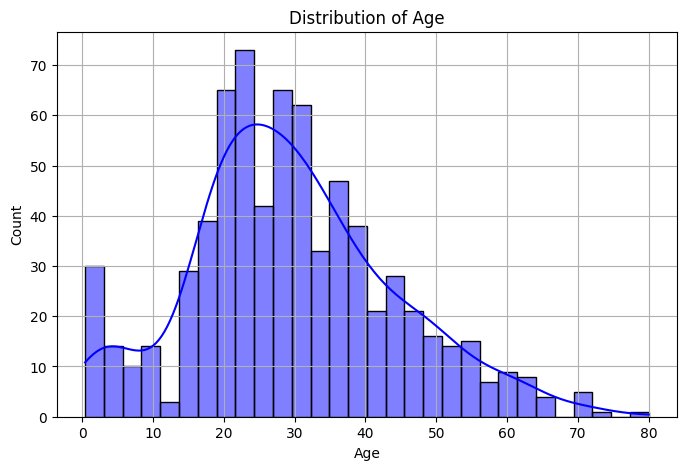

In [616]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(train_x['Age'], bins=30, kde=True, color='blue')  # KDE=Trueで確率密度関数も描画
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")
plt.grid(True)
plt.show()

NaNが2つ以上ある行を確認

In [617]:
nan_rows = train_x[train_x.isna().sum(axis=1) >= 2]
print(nan_rows)
#3個あるものはなかった

     Pclass                                      Name     Sex  Age  SibSp  \
5         3                          Moran, Mr. James    male  NaN      0   
17        2              Williams, Mr. Charles Eugene    male  NaN      0   
19        3                   Masselmani, Mrs. Fatima  female  NaN      0   
26        3                   Emir, Mr. Farred Chehab    male  NaN      0   
28        3             O'Dwyer, Miss. Ellen "Nellie"  female  NaN      0   
..      ...                                       ...     ...  ...    ...   
859       3                          Razi, Mr. Raihed    male  NaN      0   
863       3         Sage, Miss. Dorothy Edith "Dolly"  female  NaN      8   
868       3               van Melkebeke, Mr. Philemon    male  NaN      0   
878       3                        Laleff, Mr. Kristo    male  NaN      0   
888       3  Johnston, Miss. Catherine Helen "Carrie"  female  NaN      1   

     Parch      Ticket     Fare Cabin Embarked  
5        0      330877   8

ただ乗りしている人がいる！？

In [618]:
fare_zero_rows = train_x[train_x['Fare'] == 0]
print(fare_zero_rows)

     Pclass                              Name   Sex   Age  SibSp  Parch  \
179       3               Leonard, Mr. Lionel  male  36.0      0      0   
263       1             Harrison, Mr. William  male  40.0      0      0   
271       3      Tornquist, Mr. William Henry  male  25.0      0      0   
277       2       Parkes, Mr. Francis "Frank"  male   NaN      0      0   
302       3   Johnson, Mr. William Cahoone Jr  male  19.0      0      0   
413       2    Cunningham, Mr. Alfred Fleming  male   NaN      0      0   
466       2             Campbell, Mr. William  male   NaN      0      0   
481       2  Frost, Mr. Anthony Wood "Archie"  male   NaN      0      0   
597       3               Johnson, Mr. Alfred  male  49.0      0      0   
633       1     Parr, Mr. William Henry Marsh  male   NaN      0      0   
674       2        Watson, Mr. Ennis Hastings  male   NaN      0      0   
732       2              Knight, Mr. Robert J  male   NaN      0      0   
806       1            An

## 特徴量の作成

### 行のNaNの数の特徴量を作成する

In [619]:
#train_x["num_missing"] = train_x.isna().sum(axis=1)
#test_x["num_missing"] = test_x.isna().sum(axis=1)

### Fareが０の特徴量の列の作成

In [620]:
#使えなかった
train_x["fare_zero"] = (train_x['Fare'] == 0).astype(int)
test_x["fare_zero"] = (test_x['Fare'] == 0).astype(int)

### Cabinから新たな特徴量を作成する

In [621]:
train_x['Cabin_Deck'] = train_x['Cabin'].astype(str).str[0]
train_x.loc[train_x['Cabin'].isna(),'Cabin_Deck'] = np.nan

test_x['Cabin_Deck'] = test_x['Cabin'].astype(str).str[0]
test_x.loc[test_x['Cabin'].isna(),'Cabin_Deck'] = np.nan

print(train_x['Cabin_Deck'])

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin_Deck, Length: 891, dtype: object


### Name列からタイトルを抽出

In [622]:
# Name列からタイトルを抽出
train_x['Title'] = train_x['Name'].str.extract(r',\s*([^\.]+)\.')
test_x['Title'] = test_x['Name'].str.extract(r',\s*([^\.]+)\.')

# 稀なタイトルを結合
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 
               'Jonkheer', 'Dona', 'Mlle', 'Mme', 'Ms', 'the Countess']
train_x['Title'] = train_x['Title'].replace(rare_titles,'Rare')
test_x['Title'] = test_x['Title'].replace(rare_titles,'Rare')

print(train_x['Title'].value_counts())
print(test_x['Title'].value_counts())

Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64
Title
Mr        240
Miss       78
Mrs        72
Master     21
Rare        7
Name: count, dtype: int64


### 家族人数の特徴量の作成をする

In [623]:
#家族人数の合計
train_x['FamilySize'] = train_x['SibSp'] + train_x['Parch'] + 1
test_x['FamilySize'] = test_x['SibSp'] + test_x['Parch'] + 1

### 料金/家族人数の特徴量を作成する

In [624]:
train_x['FarePerFamilyMember'] = train_x['Fare'] / train_x['FamilySize']
test_x['FarePerFamilyMember'] = test_x['Fare'] / train_x['FamilySize']

train_x['FarePerFamilyMember']

0       3.62500
1      35.64165
2       7.92500
3      26.55000
4       8.05000
         ...   
886    13.00000
887    30.00000
888     5.86250
889    30.00000
890     7.75000
Name: FarePerFamilyMember, Length: 891, dtype: float64

### LastNameの特徴量を作成する

In [625]:
#姓(LastName)を抽出して新しい列に追加
train_x['LastName'] = train['Name'].str.split(',').str[0]
test_x['LastName'] = test['Name'].str.split(',').str[0]

In [626]:
train_x['LastName'].value_counts()

LastName
Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: count, Length: 667, dtype: int64

### LastNameからSameNameの列を作成する

In [627]:
#LastNameの登場回数を記録
train_x['Same_Name'] = train_x['LastName'].map(train_x['LastName'].value_counts())
test_x['Same_Name'] = test_x['LastName'].map(test_x['LastName'].value_counts())

### Ticketから特徴量を作る

In [628]:
def classify_ticket(ticket):
    #  1. Numeric（すべて数値）
    if ticket.isdigit():
        return "Numeric"
    
    #  2. SpecialChar（"/" や "." を含む場合）
    elif "/" in ticket or "." in ticket:
        return "SpecialChar"
    
    #  3. Alphanumeric（英字と数字の両方を含む場合）
    elif any(char.isdigit() for char in ticket) and any(char.isalpha() for char in ticket):
        return "Alphanumeric"
    
    #  4. Unknown（どれにも当てはまらない場合）
    else:
        return "Unknown"

In [629]:
train_x["Ticket_Tpye"] = train_x["Ticket"].apply(classify_ticket)
test_x["Ticket_Tpye"] = test_x["Ticket"].apply(classify_ticket)
print(train_x['Ticket_Tpye'].value_counts())

Ticket_Tpye
Numeric         661
SpecialChar     150
Alphanumeric     76
Unknown           4
Name: count, dtype: int64


In [630]:
#正しく分類できているか確認
train_x[train_x["Ticket_Tpye"] == "SpecialChar"]["Ticket"]

0             A/5 21171
2      STON/O2. 3101282
12            A/5. 2151
33           C.A. 24579
37           A./5. 2152
             ...       
866       SC/PARIS 2149
874           P/PP 3381
883    C.A./SOTON 34068
884     SOTON/OQ 392076
888          W./C. 6607
Name: Ticket, Length: 150, dtype: object

### 子どもだけの特徴量を作成したい

In [631]:
#妻から夫を算出
filtered_rows = train_x[(train_x["Title"] == "Mrs") & (train_x["SibSp"] == 1)]
print(filtered_rows)

     Pclass                                               Name     Sex   Age  \
1         1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
9         2                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0   
18        3  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0   
25        3  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0   
..      ...                                                ...     ...   ...   
849       1       Goldenberg, Mrs. Samuel L (Edwiga Grabowska)  female   NaN   
854       2      Carter, Mrs. Ernest Courtenay (Lilian Hughes)  female  44.0   
856       1         Wick, Mrs. George Dennick (Mary Hitchcock)  female  45.0   
871       1   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0   
874       2              Abelson, Mrs. Samuel (Hannah Wizosky)  female  28.0   

     SibSp  Parch     Ticket      Fare 

### 子か親の欄を2人いる時は親だと仮定して特徴量の作成

In [632]:
#train_x['Parch_child'] = (train_x['Parch']==2) & ((train_x['Title'] == 'Miss') | (train_x['Parch'] == 'Master'))
#train_x

### Ageデータの結合

In [633]:
train_cabin_data = pd.read_csv('cabin_data/train_cabin_data1.csv')
test_cabin_data = pd.read_csv('cabin_data/test_cabin_data1.csv')

train_x = pd.concat([train_x,train_cabin_data['Predict_Cabin']],axis=1)
test_x = pd.concat([test_x,test_cabin_data['Predict_Cabin']],axis=1)

### Ageを二値に分類

In [634]:
train_x['Age_missing'] = train_x['Age'].isnull().astype(int)
test_x['Age_missing'] = test_x['Age'].isnull().astype(int)

### Cabinデータ結合

In [635]:
train_age_data = pd.read_csv('age_data/train_age_data1.csv')
test_age_data = pd.read_csv('age_data/test_age_data1.csv')

train_x = pd.concat([train_x,train_age_data['Predict_Age']],axis=1)
test_x = pd.concat([test_x,test_age_data['Predict_Age']],axis=1)

In [636]:
train_x['Cabin_missing'] = train_x['Cabin_Deck'].isnull().astype(int)
test_x['Cabin_missing'] = test_x['Cabin_Deck'].isnull().astype(int)

### LastNameの長さから特徴量を作成する

In [637]:
# 名前の長さを特徴量として追加
train_x['LastName_length'] = train_x['LastName'].apply(len)
test_x['LastName_length'] = test_x['LastName'].apply(len)

# 確認
print(train_x[['LastName', 'LastName_length']].head())

    LastName  LastName_length
0     Braund                6
1    Cumings                7
2  Heikkinen                9
3   Futrelle                8
4      Allen                5


### 最終データ確認

In [638]:
train_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,FamilySize,FarePerFamilyMember,LastName,Same_Name,Ticket_Tpye,Predict_Cabin,Age_missing,Predict_Age,Cabin_missing,LastName_length
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,...,2,3.62500,Braund,2,SpecialChar,7,0,22.0,1,6
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,...,2,35.64165,Cumings,1,Alphanumeric,2,0,38.0,0,7
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,...,1,7.92500,Heikkinen,1,SpecialChar,7,0,26.0,1,9
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,...,2,26.55000,Futrelle,2,Numeric,2,0,35.0,0,8
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,...,1,8.05000,Allen,2,Numeric,7,0,35.0,1,5


In [639]:
test_x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,FamilySize,FarePerFamilyMember,LastName,Same_Name,Ticket_Tpye,Predict_Cabin,Age_missing,Predict_Age,Cabin_missing,LastName_length
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,1,3.91460,Kelly,1,Numeric,7,0,34.5,1,5
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,2,3.50000,Wilkes,1,Numeric,7,0,47.0,1,6
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,1,9.68750,Myles,1,Numeric,7,0,62.0,1,5
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,1,4.33125,Wirz,1,Numeric,7,0,27.0,1,4
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,3,12.28750,Hirvonen,1,Numeric,7,0,22.0,1,8


### 変更した特徴量の削除

In [640]:
#変数を削除する
train_x = train_x.drop(['Name','Ticket','LastName','Cabin' ,'fare_zero','Age','Fare','Cabin_Deck'],axis=1)
test_x = test_x.drop(['Name','Ticket','LastName','Cabin','fare_zero','Age','Fare','Cabin_Deck'],axis=1)

In [641]:
#変数を削除する
#train_x = train_x.drop(['Name','Ticket','LastName','Cabin','fare_zero','Age_missing'],axis=1)
#test_x = test_x.drop(['Name','Ticket','LastName','Cabin','fare_zero','Age_missing'],axis=1)

### one-hot encodingを行う

In [642]:
"""
# One-hot encoding
for c in ['Title','Sex','Ticket_Tpye']:
    combined = pd.concat([train_x[c], test_x[c]], axis=0)
    combined_dummies = pd.get_dummies(combined, prefix=c)
    
    train_x = train_x.join(combined_dummies[:len(train_x)])
    test_x = test_x.join(combined_dummies[len(train_x):])

    train_x.drop(c, axis=1, inplace=True)
    test_x.drop(c, axis=1, inplace=True)
#"""

"\n# One-hot encoding\nfor c in ['Title','Sex','Ticket_Tpye']:\n    combined = pd.concat([train_x[c], test_x[c]], axis=0)\n    combined_dummies = pd.get_dummies(combined, prefix=c)\n    \n    train_x = train_x.join(combined_dummies[:len(train_x)])\n    test_x = test_x.join(combined_dummies[len(train_x):])\n\n    train_x.drop(c, axis=1, inplace=True)\n    test_x.drop(c, axis=1, inplace=True)\n#"

### label enocdingを行う

In [643]:
from sklearn.preprocessing import LabelEncoder

#for c in ['Embarked','Cabin_Deck']:
for c in ['Embarked','Title','Sex','Ticket_Tpye']:
    #学習データをどう変換するかを決める
    le = LabelEncoder()
    le.fit(train_x[c].fillna('NA')) #欠損値の変換

    train_x[c] = le.transform(train_x[c].fillna('NA'))
    test_x[c] = le.transform(test_x[c].fillna('NA'))

In [644]:
train_x.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,FamilySize,FarePerFamilyMember,Same_Name,Ticket_Tpye,Predict_Cabin,Age_missing,Predict_Age,Cabin_missing,LastName_length
0,3,1,1,0,3,2,2,3.62500,2,2,7,0,22.0,1,6
1,1,0,1,0,0,3,2,35.64165,1,0,2,0,38.0,0,7
2,3,0,0,0,3,1,1,7.92500,1,2,7,0,26.0,1,9
3,1,0,1,0,3,3,2,26.55000,2,1,2,0,35.0,0,8
4,3,1,0,0,3,2,1,8.05000,2,1,7,0,35.0,1,5


### モデルの評価

In [645]:
#"""
import numpy as np
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, brier_score_loss
from sklearn.model_selection import KFold, GridSearchCV
from xgboost import XGBClassifier

# チューニング候補とするパラメータを準備する
param_space = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8],
    'min_child_weight': [3, 4, 5, 6, 7, 8 ,9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'n_estimators': [50, 100, 200, 300,400,500]
}

# XGBoostモデルを準備する
model = XGBClassifier(random_state=71)

# GridSearchCVを使用して最適なパラメータを探索する
#grid_search = GridSearchCV(estimator=model, param_grid=param_space, scoring='neg_log_loss', cv=4)
grid_search = GridSearchCV(estimator=model, param_grid=param_space, scoring='neg_log_loss', cv=4, n_jobs=-1)
grid_search.fit(train_x, train_y)

# 最適なパラメータ
best_params = grid_search.best_params_
print(f'最適なパラメータ: {best_params}')

# 最適なパラメータで再学習
model.set_params(**best_params)

# 最適なしきい値を計算するための候補
thresholds = np.arange(0.0, 1.01, 0.001)
best_thresholds = []  # 各foldごとの最適なしきい値を保存

# 各foldでの学習と評価
kf = KFold(n_splits=4, shuffle=True, random_state=71)

# スコアを保存するリスト
scores_logloss = []
scores_accuracy = []
scores_auc = []
scores_f1 = []
scores_precision = []
scores_recall = []
scores_brier = []

for tr_idx, va_idx in kf.split(train_x):
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    # モデルの学習
    model.fit(tr_x, tr_y)

    # バリデーションデータに対する予測
    va_pred_prob = model.predict_proba(va_x)[:, 1]

    # 各しきい値ごとのF1スコアを計算
    f1_scores = [f1_score(va_y, va_pred_prob > t) for t in thresholds]

    # 最も F1 スコアが高いしきい値を取得
    best_threshold = thresholds[np.argmax(f1_scores)]
    best_thresholds.append(best_threshold)

    # 各スコアを計算
    scores_logloss.append(log_loss(va_y, va_pred_prob))
    scores_accuracy.append(accuracy_score(va_y, va_pred_prob > best_threshold))
    scores_auc.append(roc_auc_score(va_y, va_pred_prob))
    scores_f1.append(f1_score(va_y, va_pred_prob > best_threshold))
    scores_precision.append(precision_score(va_y, va_pred_prob > best_threshold))
    scores_recall.append(recall_score(va_y, va_pred_prob > best_threshold))
    scores_brier.append(brier_score_loss(va_y, va_pred_prob))

# しきい値の平均をとる
optimal_threshold = np.mean(best_thresholds)
print(f'最適なしきい値: {optimal_threshold:.4f}')

# 各指標の平均を出力
print(f'Log Loss: {np.mean(scores_logloss):.4f}')
print(f'Accuracy: {np.mean(scores_accuracy):.4f}')
print(f'AUC-ROC: {np.mean(scores_auc):.4f}')
print(f'F1 Score: {np.mean(scores_f1):.4f}')
print(f'Precision: {np.mean(scores_precision):.4f}')
print(f'Recall: {np.mean(scores_recall):.4f}')
print(f'Brier Score: {np.mean(scores_brier):.4f}')
#"""

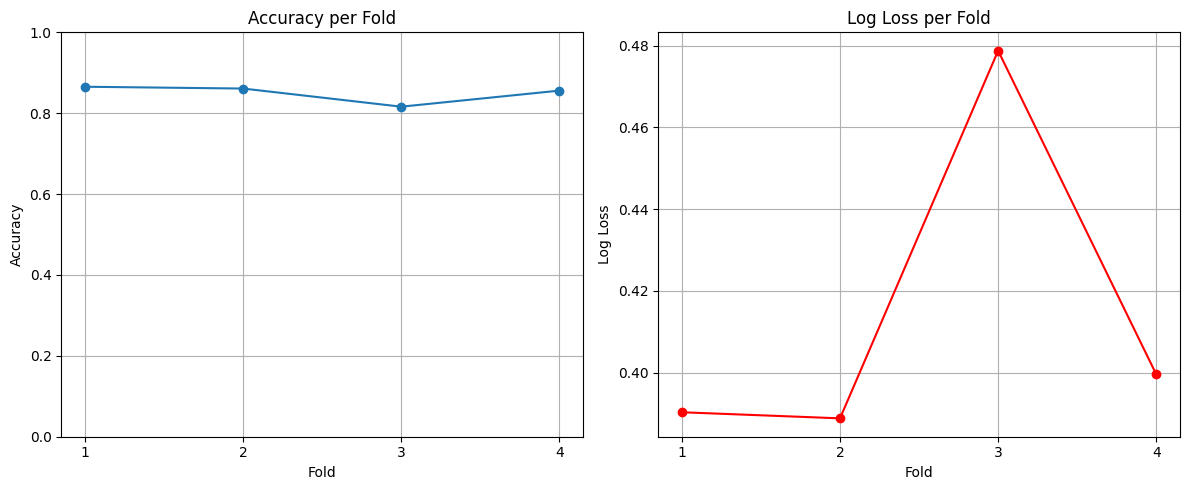

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 各Foldのスコアの推移
folds = np.arange(1, len(scores_accuracy) + 1)

plt.figure(figsize=(12, 5))

# Accuracyの推移
plt.subplot(1, 2, 1)
plt.plot(folds, scores_accuracy, marker='o', linestyle='-', label="Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy per Fold")
plt.xticks(folds)
plt.ylim(0, 1)
plt.grid(True)

# Log Lossの推移
plt.subplot(1, 2, 2)
plt.plot(folds, scores_logloss, marker='o', linestyle='-', color='red', label="Log Loss")
plt.xlabel("Fold")
plt.ylabel("Log Loss")
plt.title("Log Loss per Fold")
plt.xticks(folds)
plt.grid(True)

plt.tight_layout()
plt.show()


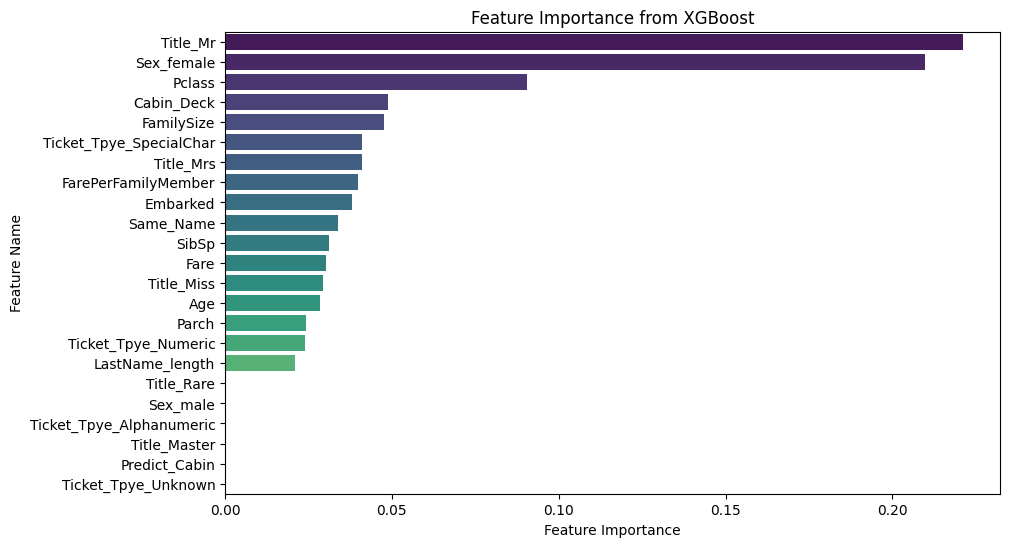

In [ ]:
# 特徴量の重要度を取得
feature_importances = model.feature_importances_
features = train_x.columns

# データフレーム化
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 可視化
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance from XGBoost')
plt.show()

In [ ]:
# 欠損値の有無を確認
print(train_x.isnull().sum())


Pclass                        0
Age                         177
SibSp                         0
Parch                         0
Fare                          0
Embarked                      0
Cabin_Deck                    0
FamilySize                    0
FarePerFamilyMember           0
Same_Name                     0
Predict_Cabin                 0
LastName_length               0
Title_Master                  0
Title_Miss                    0
Title_Mr                      0
Title_Mrs                     0
Title_Rare                    0
Sex_female                    0
Sex_male                      0
Ticket_Tpye_Alphanumeric      0
Ticket_Tpye_Numeric           0
Ticket_Tpye_SpecialChar       0
Ticket_Tpye_Unknown           0
dtype: int64


In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAPのExplainerを作成
explainer = shap.Explainer(model, train_x)

# SHAP値を計算
shap_values = explainer(train_x)

# 特徴量の重要度を可視化（サマリープロット）
shap.summary_plot(shap_values, train_x)

# 特定のサンプルについてSHAPの力価プロットを表示（例: 0番目のデータ）
shap.plots.waterfall(shap_values[0])

Found a NULL input array in _cext_dense_tree_update_weights!


TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

Y軸：特徴量の名前（影響度が高い順に並ぶ）   
X軸：SHAP値（各特徴が予測に与える影響の大きさ） 
色：  
赤色 → 特徴量の値が大きい（高値）  
青色 → 特徴量の値が小さい（低値）  
解釈：  
右側（SHAP値がプラス）：生存の確率を上げる方向に影響  
左側（SHAP値がマイナス）：生存の確率を下げる方向に影響  
赤色の点が右に多い特徴 → 値が大きいほど生存確率が上がる  
青色の点が右に多い特徴 → 値が小さいほど生存確率が上がる  

左側のバー：基準値（モデルの全体的な予測確率）  
各特徴のバー：  
赤：予測確率を上げる  
青：予測確率を下げる  
バーの長さ：影響の強さ  

In [ ]:
# クロスバリデーションで最適なしきい値を見つける
best_threshold = 0.3602  # 以前のコードで求めた最適なしきい値

# モデル作成
params = {
    'colsample_bytree': 0.6,
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_child_weight': 8,
    'n_estimators': 500,
    'subsample': 0.6
}
model.fit(train_x, train_y)

# テストデータの予測確率を取得
pred_prob = model.predict_proba(test_x)[:, 1]

# 最適なしきい値を使用して予測値を二値に変換
pred_label = np.where(pred_prob > best_threshold, 1, 0)

# 提出用ファイルの作成
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'], 
    'Survived': pred_label
})

# 提出用ファイルの保存（例: 'submission.csv'）
#submission.to_csv('submit/submission_18.csv', index=False)

# 出力確認
print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


### モデルのチューニング

In [ ]:
"""
import itertools
import numpy as np
from sklearn.model_selection import KFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

# チューニング候補とするパラメータを準備する
param_space = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'min_child_weight': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# XGBoostモデルを準備する
xgb_model = XGBClassifier(random_state=71)

# GridSearchCVを使ってハイパーパラメータチューニングを行う
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_space, 
                           scoring='neg_log_loss', cv=4, verbose=1, n_jobs=-1)

# クロスバリデーションを行う
grid_search.fit(train_x, train_y)

# 最適なパラメータを表示
best_param = grid_search.best_params_
print(f"Best parameters found: {best_param}")

# 最適なモデルでスコアを計算
best_model = grid_search.best_estimator_

# テストデータに対する予測とlog_loss計算
va_pred = best_model.predict_proba(test_x)[:, 1]
logloss = log_loss(test_y, va_pred)
print(f"Test log loss: {logloss}")
"""

'\nimport itertools\nimport numpy as np\nfrom sklearn.model_selection import KFold, GridSearchCV\nfrom xgboost import XGBClassifier\nfrom sklearn.metrics import log_loss\n\n# チューニング候補とするパラメータを準備する\nparam_space = {\n    \'max_depth\': [1, 2, 3, 4, 5, 6],\n    \'min_child_weight\': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0],\n    \'learning_rate\': [0.01, 0.05, 0.1, 0.2],\n    \'subsample\': [0.6, 0.8, 1.0],\n    \'colsample_bytree\': [0.6, 0.8, 1.0],\n    \'gamma\': [0, 0.1, 0.2],\n    \'n_estimators\': [50, 100, 200]\n}\n\n# XGBoostモデルを準備する\nxgb_model = XGBClassifier(random_state=71)\n\n# GridSearchCVを使ってハイパーパラメータチューニングを行う\ngrid_search = GridSearchCV(estimator=xgb_model, param_grid=param_space, \n                           scoring=\'neg_log_loss\', cv=4, verbose=1, n_jobs=-1)\n\n# クロスバリデーションを行う\ngrid_search.fit(train_x, train_y)\n\n# 最適なパラメータを表示\nbest_param = grid_search.best_params_\nprint(f"Best parameters found: {best_param}")\n\n# 最適なモデルでスコアを計算\nbest_model = grid_search.best_estimator_\n\n# テス

In [ ]:
"""ほんのコード
import itertools

# チューニング候補とするパラメータを準備する
param_space = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'min_child_weight': [1.0,2.0,3.0, 4.0, 5.0, 6.0]
}

# 探索するハイパーパラメータの組み合わせ
param_combinations = itertools.product(param_space['max_depth'], param_space['min_child_weight'])

# 各パラメータの組み合わせ、それに対するスコアを保存するリスト
params = []
scores = []

# 各パラメータの組み合わせごとに、クロスバリデーションで評価を行う
for max_depth, min_child_weight in param_combinations:

    score_folds = []
    # クロスバリデーションを行う
    # 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す
    kf = KFold(n_splits=4, shuffle=True, random_state=123456)
    for tr_idx, va_idx in kf.split(train_x):
        # 学習データを学習データとバリデーションデータに分ける
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

        # モデルの学習を行う
        model = XGBClassifier(n_estimators=20, random_state=71,
                              max_depth=max_depth, min_child_weight=min_child_weight)
        model.fit(tr_x, tr_y)

        # バリデーションデータでのスコアを計算し、保存する
        va_pred = model.predict_proba(va_x)[:, 1]
        logloss = log_loss(va_y, va_pred)
        score_folds.append(logloss)

    # 各foldのスコアを平均する
    score_mean = np.mean(score_folds)

    # パラメータの組み合わせ、それに対するスコアを保存する
    params.append((max_depth, min_child_weight))
    scores.append(score_mean)

# 最もスコアが良いものをベストなパラメータとする
best_idx = np.argsort(scores)[0]
best_param = params[best_idx]
print(f'max_depth: {best_param[0]}, min_child_weight: {best_param[1]}')
"""

"ほんのコード\nimport itertools\n\n# チューニング候補とするパラメータを準備する\nparam_space = {\n    'max_depth': [1, 2, 3, 4, 5, 6],\n    'min_child_weight': [1.0,2.0,3.0, 4.0, 5.0, 6.0]\n}\n\n# 探索するハイパーパラメータの組み合わせ\nparam_combinations = itertools.product(param_space['max_depth'], param_space['min_child_weight'])\n\n# 各パラメータの組み合わせ、それに対するスコアを保存するリスト\nparams = []\nscores = []\n\n# 各パラメータの組み合わせごとに、クロスバリデーションで評価を行う\nfor max_depth, min_child_weight in param_combinations:\n\n    score_folds = []\n    # クロスバリデーションを行う\n    # 学習データを4つに分割し、うち1つをバリデーションデータとすることを、バリデーションデータを変えて繰り返す\n    kf = KFold(n_splits=4, shuffle=True, random_state=123456)\n    for tr_idx, va_idx in kf.split(train_x):\n        # 学習データを学習データとバリデーションデータに分ける\n        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]\n        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]\n\n        # モデルの学習を行う\n        model = XGBClassifier(n_estimators=20, random_state=71,\n                              max_depth=max_depth, min_child_weight=min_child_weigh

### 最適な閾値を調べるためにF1が一番良いのを探す

In [ ]:
"""
import numpy as np
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

# しきい値の候補を定義
thresholds = np.arange(0.0, 1.01, 0.01)

kf = KFold(n_splits=4, shuffle=True, random_state=71)
best_thresholds = []  # 各foldごとの最適なしきい値を保存

for tr_idx, va_idx in kf.split(train_x):
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    model = XGBClassifier(n_estimators=20, random_state=71, max_depth=2, min_child_weight=6.0)
    model.fit(tr_x, tr_y)

    va_pred_prob = model.predict_proba(va_x)[:, 1]

    # 各しきい値ごとのF1スコアを計算
    f1_scores = [f1_score(va_y, va_pred_prob > t) for t in thresholds]

    # 最も F1 スコアが高いしきい値を取得
    best_threshold = thresholds[np.argmax(f1_scores)]
    best_thresholds.append(best_threshold)

# しきい値の平均をとる
optimal_threshold = np.mean(best_thresholds)
print(f'最適なしきい値: {optimal_threshold:.4f}')
"""

"\nimport numpy as np\nfrom sklearn.metrics import f1_score\nfrom sklearn.model_selection import KFold\nfrom xgboost import XGBClassifier\n\n# しきい値の候補を定義\nthresholds = np.arange(0.0, 1.01, 0.01)\n\nkf = KFold(n_splits=4, shuffle=True, random_state=71)\nbest_thresholds = []  # 各foldごとの最適なしきい値を保存\n\nfor tr_idx, va_idx in kf.split(train_x):\n    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]\n    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]\n\n    model = XGBClassifier(n_estimators=20, random_state=71, max_depth=2, min_child_weight=6.0)\n    model.fit(tr_x, tr_y)\n\n    va_pred_prob = model.predict_proba(va_x)[:, 1]\n\n    # 各しきい値ごとのF1スコアを計算\n    f1_scores = [f1_score(va_y, va_pred_prob > t) for t in thresholds]\n\n    # 最も F1 スコアが高いしきい値を取得\n    best_threshold = thresholds[np.argmax(f1_scores)]\n    best_thresholds.append(best_threshold)\n\n# しきい値の平均をとる\noptimal_threshold = np.mean(best_thresholds)\nprint(f'最適なしきい値: {optimal_threshold:.4f}')\n"

### 各Foldのスコアの変動を可視化

In [ ]:
"""
import matplotlib.pyplot as plt
import numpy as np

# 各Foldのスコアの推移
folds = np.arange(1, len(scores_accuracy) + 1)

plt.figure(figsize=(12, 5))

# Accuracyの推移
plt.subplot(1, 2, 1)
plt.plot(folds, scores_accuracy, marker='o', linestyle='-', label="Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.title("Accuracy per Fold")
plt.xticks(folds)
plt.ylim(0, 1)
plt.grid(True)

# Log Lossの推移
plt.subplot(1, 2, 2)
plt.plot(folds, scores_logloss, marker='o', linestyle='-', color='red', label="Log Loss")
plt.xlabel("Fold")
plt.ylabel("Log Loss")
plt.title("Log Loss per Fold")
plt.xticks(folds)
plt.grid(True)

plt.tight_layout()
plt.show()
"""


'\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# 各Foldのスコアの推移\nfolds = np.arange(1, len(scores_accuracy) + 1)\n\nplt.figure(figsize=(12, 5))\n\n# Accuracyの推移\nplt.subplot(1, 2, 1)\nplt.plot(folds, scores_accuracy, marker=\'o\', linestyle=\'-\', label="Accuracy")\nplt.xlabel("Fold")\nplt.ylabel("Accuracy")\nplt.title("Accuracy per Fold")\nplt.xticks(folds)\nplt.ylim(0, 1)\nplt.grid(True)\n\n# Log Lossの推移\nplt.subplot(1, 2, 2)\nplt.plot(folds, scores_logloss, marker=\'o\', linestyle=\'-\', color=\'red\', label="Log Loss")\nplt.xlabel("Fold")\nplt.ylabel("Log Loss")\nplt.title("Log Loss per Fold")\nplt.xticks(folds)\nplt.grid(True)\n\nplt.tight_layout()\nplt.show()\n'

### 重要な特徴量の可視化

In [ ]:
"""
# 特徴量の重要度を取得
feature_importances = model.feature_importances_
features = train_x.columns

# データフレーム化
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 可視化
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance from XGBoost')
plt.show()
"""


"\n# 特徴量の重要度を取得\nfeature_importances = model.feature_importances_\nfeatures = train_x.columns\n\n# データフレーム化\nimportance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})\nimportance_df = importance_df.sort_values(by='Importance', ascending=False)\n\n# 可視化\nplt.figure(figsize=(10, 6))\nsns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)\nplt.xlabel('Feature Importance')\nplt.ylabel('Feature Name')\nplt.title('Feature Importance from XGBoost')\nplt.show()\n"

In [ ]:
"""
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, brier_score_loss

# 各foldのスコアを保持するリスト
scores_logloss = []
scores_accuracy = []
scores_auc = []
scores_f1 = []
scores_precision = []
scores_recall = []
scores_brier = []

kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx in kf.split(train_x):
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    model = XGBClassifier(n_estimators=20, random_state=71, max_depth=2, min_child_weight=6.0)
    model.fit(tr_x, tr_y)

    va_pred_prob = model.predict_proba(va_x)[:, 1]
    va_pred_binary = va_pred_prob > 0.3625

    # 各スコアを計算
    scores_logloss.append(log_loss(va_y, va_pred_prob))
    scores_accuracy.append(accuracy_score(va_y, va_pred_binary))
    scores_auc.append(roc_auc_score(va_y, va_pred_prob))
    scores_f1.append(f1_score(va_y, va_pred_binary))
    scores_precision.append(precision_score(va_y, va_pred_binary))
    scores_recall.append(recall_score(va_y, va_pred_binary))
    scores_brier.append(brier_score_loss(va_y, va_pred_prob))

# 平均スコアを出力
print(f'Log Loss: {np.mean(scores_logloss):.4f}')
print(f'Accuracy: {np.mean(scores_accuracy):.4f}')
print(f'AUC-ROC: {np.mean(scores_auc):.4f}')
print(f'F1 Score: {np.mean(scores_f1):.4f}')
print(f'Precision: {np.mean(scores_precision):.4f}')
print(f'Recall: {np.mean(scores_recall):.4f}')
print(f'Brier Score: {np.mean(scores_brier):.4f}')
"""


### モデルの作成・予測

In [ ]:
"""
# クロスバリデーションで最適なしきい値を見つける
best_threshold = 0.3625  # 以前のコードで求めた最適なしきい値

# モデル作成
model = XGBClassifier(n_estimators=20, random_state=71, max_depth=2, min_child_weight=6.0)
model.fit(train_x, train_y)

# テストデータの予測確率を取得
pred_prob = model.predict_proba(test_x)[:, 1]

# 最適なしきい値を使用して予測値を二値に変換
pred_label = np.where(pred_prob > best_threshold, 1, 0)

# 提出用ファイルの作成
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'], 
    'Survived': pred_label
})

# 提出用ファイルの保存（例: 'submission.csv'）
#submission.to_csv('submit/submission_eight.csv', index=False)

# 出力確認
print(submission.head())
"""

# 保存する前で0.76315

# 数値の変更忘れずに！！！